## Cel Pracy 

Celem pracy jest stworzenie modelu, który będzie w stanie rozpoznać nieuczciwe transakcje kartami kredytowymi, dzięki czemu klienci instytucji finansowej nie będą obciążani kosztami za rzeczy, których nie kupili.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

pd.options.display.float_format = "{:.3f}".format
pd.set_option('display.max_columns',100)

from matplotlib import rcParams
rcParams['figure.figsize'] = 15,6
sns.set(style='white')

In [26]:
def counts_pct(category,data):
    '''Funkcja, która zwraca dla tanej kategori liczbe wartości, oraz wartość procentową'''
    base = data[category].value_counts()
    pct = base/data[category].shape[0] * 100
    joined = pd.concat([base,pct],axis=1)
    joined.columns = [str(category),str(category) + ' %']
    return joined

def annotate(ax,s="%.0f",suffix=''):
    for p in ax.patches:
        ax.annotate(s % p.get_height() + suffix, 
                 (p.get_x() + p.get_width() / 2,
                  p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
        
def despine(rot=0):
    sns.despine(left=True)
    plt.xticks(rotation = rot);
    plt.xlabel('');
    plt.ylabel('');
    
clr = ['#b3b7b8','#c55572']

In [2]:
data = pd.read_csv('creditcard.csv')

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,0.091,-0.552,-0.618,-0.991,-0.311,1.468,-0.470,0.208,0.026,0.404,0.251,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,149.620,0
1,0.000,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,-0.167,1.613,1.065,0.489,-0.144,0.636,0.464,-0.115,-0.183,-0.146,-0.069,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,2.690,0
2,1.000,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,0.208,0.625,0.066,0.717,-0.166,2.346,-2.890,1.110,-0.121,-2.262,0.525,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,378.660,0
3,1.000,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,-0.055,-0.226,0.178,0.508,-0.288,-0.631,-1.060,-0.684,1.966,-1.233,-0.208,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,123.500,0
4,2.000,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,0.753,-0.823,0.538,1.346,-1.120,0.175,-0.451,-0.237,-0.038,0.803,0.409,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,69.990,0


In [4]:
data.shape

(284807, 31)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [6]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000
mean,94813.860,0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,88.350,0.002
std,47488.146,1.959,1.651,1.516,1.416,1.380,1.332,1.237,1.194,1.099,1.089,1.021,0.999,0.995,0.959,0.915,0.876,0.849,0.838,0.814,0.771,0.735,0.726,0.624,0.606,0.521,0.482,0.404,0.330,250.120,0.042
min,0.000,-56.408,-72.716,-48.326,-5.683,-113.743,-26.161,-43.557,-73.217,-13.434,-24.588,-4.797,-18.684,-5.792,-19.214,-4.499,-14.130,-25.163,-9.499,-7.214,-54.498,-34.830,-10.933,-44.808,-2.837,-10.295,-2.605,-22.566,-15.430,0.000,0.000
25%,54201.500,-0.920,-0.599,-0.890,-0.849,-0.692,-0.768,-0.554,-0.209,-0.643,-0.535,-0.762,-0.406,-0.649,-0.426,-0.583,-0.468,-0.484,-0.499,-0.456,-0.212,-0.228,-0.542,-0.162,-0.355,-0.317,-0.327,-0.071,-0.053,5.600,0.000
50%,84692.000,0.018,0.065,0.180,-0.020,-0.054,-0.274,0.040,0.022,-0.051,-0.093,-0.033,0.140,-0.014,0.051,0.048,0.066,-0.066,-0.004,0.004,-0.062,-0.029,0.007,-0.011,0.041,0.017,-0.052,0.001,0.011,22.000,0.000
75%,139320.500,1.316,0.804,1.027,0.743,0.612,0.399,0.570,0.327,0.597,0.454,0.740,0.618,0.663,0.493,0.649,0.523,0.400,0.501,0.459,0.133,0.186,0.529,0.148,0.440,0.351,0.241,0.091,0.078,77.165,0.000
max,172792.000,2.455,22.058,9.383,16.875,34.802,73.302,120.589,20.007,15.595,23.745,12.019,7.848,7.127,10.527,8.878,17.315,9.254,5.041,5.592,39.421,27.203,10.503,22.528,4.585,7.520,3.517,31.612,33.848,25691.160,1.000


### Zbiór Danych

Zbiór danych zawiera informacje o transakcjach dokonane kartami kredytowymi we wrześniu 2013 r. przez europejczyków. Zbiór danych przedstawia transakcje kartami płatniczymi, które miały miejsce w ciągu dwóch dni. Wśród 284 807 transakcji było 492 oszustw. Oznacza to, że jedynie 0.172% wszystkich transakcji to oszustwa.

Zbiór danych zawiera zmienne numeryczne, które są wynikiem transformacji PCA. Dane są poufne dlatego nie mamy informacji co oznaczają poszczególne kolumny. Zmienne przyjmują nazwy V1 - V28. Jedyne cechy, które znamy to data transakcji, wartość transakcji oraz flaga mówiąca czy było oszustwo (1) lub nie było (0) 

Głównym problemem tego zbioru danych jest bardzo nierównomierny. 98.28% naszego zbioru danych to transakcje bez oszustwa, a jedynie 0.172% to transakcje z oszustwem. Jest to bardzo istotne, gdy będziemy tworzyć model predykcyjny. Przy założeniu, że większość naszych transakcji nie jest oszustwem możemy otrzymać fałszywe wnioski. 

PCA (wikipedia) - jedna ze statystycznych metod analizy czynnikowej. Zbiór danych składający się z N obserwacji, z których każda obejmuje K zmiennych, można interpretować jako chmurę N punktów w przestrzeni K-wymiarowej. Celem PCA jest taki obrót układu współrzędnych, aby maksymalizować w pierwszej kolejności wariancję pierwszej współrzędnej, następnie wariancję drugiej współrzędnej itd.. Tak przekształcone wartości współrzędnych nazywane są ładunkami wygenerowanych czynników (składowych głównych). W ten sposób konstruowana jest nowa przestrzeń obserwacji, w której najwięcej zmienności wyjaśniają początkowe czynniki.

__V1 - V28__ - są to nasze cechy, które zostały przetransformowane   
__Amount__ - jest to wartość transakcji  
__Class__ - mówi czy było osztustwo/czy nie było (0/1)  
__Time__ - Liczba sekund pomiędzy pierwszą transakcją z naszego zbioru danych.   

### Eksploracja

In [12]:
counts_pct(category='Class',data=data)

,Class,Class %
0,284315,99.827
1,492,0.173


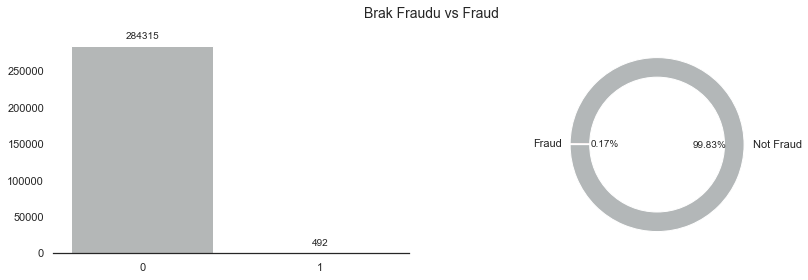

In [47]:
f,ax = plt.subplots(1,2,figsize=(14,4))
b1 = sns.countplot(x=data['Class'],palette=clr,ax=ax[0])
annotate(b1)
despine()
my_circle=plt.Circle( (0,0), 0.775, color='white')
size=data['Class'].value_counts().tolist()
plt.pie(size, labels=['Not Fraud','Fraud'], colors=['#b3b7b8','r'],autopct='%1.2f%%',startangle=180)
p=plt.gcf()
p.gca().add_artist(my_circle);
plt.setp(plt.gcf().get_axes(), xlabel='', ylabel='');
plt.suptitle('Brak Fraudu vs Fraud', fontsize=14);

### Jak poradzić sobie z nierównomiernymi danymi


Czym jest nierównomierna dystrybucja danych ? - Jest to scenariusz, w którym liczba obserwacji należących do jednej klasy jest znacznie niższa niż obserwacji należących do innych klas.

W takich sytuacjach modele predykcyjne stworzone przy użyciu konwencjonalnych algorytmów ML mogą dawać nieprawidłowe wyniki.Dzieje się tak, ponieważ algorytmy ML są zwykle zaprojektowane w celu poprawy dokładności poprzez zmniejszenie błędu jednak nie uwzględniają one rozkładu klas i ich proporcji. 

Istnieją różne podejścia do rozwiązywania problemów związanych z nierównowagą klas. Metody, które są powszechnie używane to metody próbkowania czyli "Sampling Methods". 
Metody te mają na celu zmodyfikowanie niezrównoważonych danych w zrównoważony rozkład za pomocą określonych mechanizmów. Modyfikacja następuje poprzez zmianę rozmiaru oryginalnego zestawu danych w celu zapewnienia lepszego balansu danych. 

Metody stosowane do radzenia sobie z nierównomiernymi danymi:
* Undersampling
* Oversampling
* Synthetic Data Generation
* Cost Sensitive Learning  




__Undersampling__

Ta metoda dotyczy kategorii w której mamy dominującą liczbę obserwacji. Polega na zmniejszeniu liczbę obserwacji z dominującej kategorii tak aby zbiór danych był zrównoważony. Tę metodę najlepiej stosować, gdy zestaw danych jest ogromny, a zmniejszenie liczby próbek treningowych pomaga poprawić czas działania i problemy z pamięcią.
Losowa metoda próbkowania losowo wybiera obserwacje z dominującej kategorii, które są eliminowane do momentu zrównoważenia zestawu danych. Wada - usunięcie obserwacji może spowodować utratę ważnych danych dotyczących klasy większościowej.

__Oversampling__

Ta metoda dotyczy kategorii w której mamy mniejszą liczbę obserwacji. Replikuje obserwacje z klasy mniejszości w celu zrównoważenia danych. Jest również znany jako upsampling. Losowe próbkowanie równoważy dane poprzez losowe nadpróbkowanie klasy mniejszości.  
Zaletą korzystania z tej metody jest brak utraty informacji. Wadą stosowania tej metody jest to, że ponieważ nadpróbkowanie po prostu dodaje replikowane obserwacje w oryginalnym zbiorze danych, kończy się to dodawaniem wielu obserwacji różnych typów, co prowadzi do nadmiernego dopasowania.

__Synthetic Data Generation - Generowanie danych syntetycznych__

Zamiast powielać i dodawać obserwacje z klasy mniejszościowej, pokonuje nierówności poprzez generowanie sztucznych danych. Jest to także rodzaj techniki Oversamplingu.
W odniesieniu do syntetycznego generowania danych, technika nadpróbkowania mniejszości syntetycznych (SMOTE) jest potężną i szeroko stosowaną metodą. Algorytm SMOTE tworzy sztuczne dane w oparciu o podobieństwa przestrzeni cech z próbek mniejszości. Można również powiedzieć, że generuje losowy zestaw obserwacji klasy mniejszościowej, aby przesunąć tendencję uczenia się klasyfikatora do klasy mniejszości.


__Cost Sensitive Learning__  
Jest to kolejna powszechnie stosowana metoda rozwiązywania problemów z klasyfikacją przy niezrównoważonych danych. Metoda ta ocenia koszt związany z błędnymi klasyfikacjami obserwacji. Nie tworzy zrównoważonej dystrybucji danych. Zamiast tego podkreśla problem niezrównoważonego uczenia się poprzez zastosowanie macierzy kosztów, które opisują koszty błędnej klasyfikacji w danym scenariuszu.

więcej: https://www.analyticsvidhya.com/blog/2016/03/practical-guide-deal-imbalanced-classification-problems/

Źródła:  
https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets  
https://medium.com/analytics-vidhya/credit-card-fraud-detection-in-python-using-scikit-learn-f9046a030f50  
https://www.kaggle.com/gargmanish/how-to-handle-imbalance-data-study-in-detail  
https://www.kaggle.com/lct14558/imbalanced-data-why-you-should-not-use-roc-curve  
        
    